# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|
|xgboost|0.8|

**강사: 멀티캠퍼스 강선구(sunku0316.kang@multicampus.com, sun9sun9@gmail.com)**

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys
import xgboost as xgb

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels, xgb]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1
xgboost 0.80


In [2]:
# 시각화 모듈 설정
# 참고용 차트를 출력하기 위함

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 문제 개요

다음은 폴더블 폰의 힌지에 들어가는 스프링 내구력을 테스트한 실험 결과이다. 

스프링 측정값과 스프링에 가한 부하 정보와 함께, 테스트 통과/실패 (failure) 결과가 기재되어 있다. 

개발부서는 테스트 비용을 줄이기 위해 failure 여부를 맞추는 모델을 만들고자 한다.

변수명은 보안을 위해 measurement_0과 같이 익명화되었다.

데이터 구성

학습데이터: train_prob.csv, 21,458 rows, 25 columns

테스트데이터: test_prob.csv, 5,112 rows, 24 columns, 

테스트정답셋: test_prob_ans.csv, 5,112 rows, 1 columns


**변수 설명**

|변수명|설명|타입|
|--|--------------|------|
|id|실험 고유 번호|정수형|
|product_code|스프링 코드|범주형|
|loading|스프링에 가한 부하|실수형|
|attribute_0|구성 소재1|범주형|
|attribute_1|구성 소재2|범주형|
|attribute_2|구성 소재3|정수형|
|attribute_3|구성 소재4|정수형|
|measurement_0 ~ 17|측정값 0~17|실수형|
|failure|성공여부|이진형(0, 1)|


# 전처리(Preprocessing)

train_prob.csv를 불러 온다. 이를 **basetable**이라고 한다.

In [3]:
# 데이터를 식별할 만한 변수(고윳값)가 있으면 인덱스로 사용합니다.
# 여기서는 id를 인덱스로 지정해볼만 합니다.
# 이 과정은 필수는 아닙니다.
df_basetable = pd.read_csv('train_prob.csv', index_col=['id'])
display(df_basetable.head())
df_basetable.info()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                              ...   
0               7              8              4         18.040  ...   
1              14              3              3         18.213  ...   
2              12              1              5         18.057  ...   
3              13              2              6         17.295  ...   
4               9              2              8         19.346  ...   

    measurement_9  measurement_10  measurement_11  measurement_12  \
id                                                                  
0          10.672          15.859          17.594          15.193   
1          12.448          17.947          17.915          11.755   
2          12.715          15.607             NaN          13.798   
3          12.471          16.346          18.377          10.020   
4          10.337          17.082          19.932          12.428   

    measurement_13  measurement_14  measurement_15  measurement_16  \
id                                                                   
0           15.029             NaN          13.034          14.684   
1           14.732          15.425          14.395          15.631   
2           16.711          18.631          14.094          17.946   
3           15.250          15.562          16.154          17.172   
4           16.182          12.760          13.153          16.412   

    measurement_17  failure  
id                           
0          764.100        0  
1          682.057        0  
2          663.376        0  
3          826.282        0  
4          579.885        0  

[5 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 26569
Data columns (total 25 columns):
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
measurement_15    19855 non-null float64
me

In [4]:
# 'attribute_0', 'attribute_1'이 정수형이지만, 범주형으로 사용할 수 있을지 봅니다.
df_basetable[['attribute_0', 'attribute_1']].nunique()

attribute_0    2
attribute_1    3
dtype: int64

# 단계 1

**basetable**에 measurement_3 ~17 각각의 행이 결측인지 나타내는 파생 변수를 만든다. 

파생 변수는 이진 형식이고, False는 미결측 True는 결측을 의미한다. 

파생 변수의 이름은 measurement 번호에 따라 isna_3 ~ 17로 한다. 

In [5]:
df_basetable = df_basetable.join(
    df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].isna().rename(
        # columns에 lambda함수를 쓰면 x에 컬럼명에 들어온 변수명은 반환값으로 바뀝니다.
        columns = lambda x: x.replace('measurement', 'isna') 
    )
)
df_basetable.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  ...  isna_8  \
id                                                              ...           
0               7              8              4         18.040  ...   False   
1              14              3              3         18.213  ...   False   
2              12              1              5         18.057  ...   False   
3              13              2              6         17.295  ...   False   
4               9              2              8         19.346  ...   False   

    isna_9  isna_10  isna_11  isna_12  isna_13  isna_14  isna_15  isna_16  \
id                                                                          
0    False    False    False    False    False     True    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False     True    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

    isna_17  
id           
0     False  
1     False  
2     False  
3     False  
4     False  

[5 rows x 40 columns]

## 단계 2

이 과제를 맡은 데이터분석가 지희는 measurement_3~17의 결측치 처리 방안을 고민하던 중, 

개발부서에서 measurement_17은 product_code별로 failure를 예측하기 위해 

measurement_3 ~ measurement_9을 다음과 같이 선형 조합하여 생성한 값이라는 정보를 받았다. 

$measurement_{17}= \beta_{0} + \beta_{3}measurement_{3}+\beta_{4}measurement_{4}+...+\beta_{9}measurement_{9}$

이는 즉,

$measurement_{3}= \beta'_{0} + \beta'_{4}measurement_{4}+\beta'_{5}measurement_{5}+...+\beta'_{9}measurement_{9} + \beta'_{17}measurement_{17}$

...

$measurement_{9}= \beta''_{0} + \beta''_{3}measurement_{3}+\beta''_{4}measurement_{4}+...+\beta''_{8}measurement_{8}+\beta''_{17}measurement_{17}$

와 같이 measurement_3 ~ measurement_9의 각 변수들도 나머지 변수들과 선형 관계를 지닌다. 

이 점을 이용하여 대상 변수를 번갈아 가면서 예측 모델을 만들어 최대한 원래 값에 가깝게 복원할 수 있다. 

이러한 반복적인 결측치 복원 방법을 사내 데이터분석 연구소에 문의 했더니 다음과 같은 가이드를 주었다. 

> sklearn 모듈에 아직은 실험 단계이지만, 비슷한 경우에 문제 없이 사용했던 사례가 있어 의견을 드립니다. 
>
> from sklearn.experimental import enable_iterative_imputer 구문을 사용하여 실험 단계인 모듈을 활성화하고, 
>
> sklearn.impute.IterativeImputer를 사용한다면 원하는 결과를 얻을 수 있습니다.

가이드의 내용을 바탕으로 위의 **product_code** 별 measurement3-9, measurement17의 선형 관계를 이용하여,

**basetable**의 measurement_3 ~ 9와 measurement_17의 결측치를 복원하라.


입력 변수] measurement_3 ~ 9, measurement_17 (입력 변수 순서에 유의)

---
**함수가이드**

sklearn.experimental.enable_iterative_imputer

sklearn.impute.IterativeImputer, random_state=123

sklearn.linear_model.LinearRegression

문제 지시사항 외 Default 값 사용

---


In [6]:
# 방법 1: 반복문
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer# , random_state=123
from sklearn.linear_model import LinearRegression

imp = IterativeImputer(
    # 𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡17=𝛽0+𝛽3𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡3+𝛽4𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡4+...+𝛽9𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡9
    # 출제자는 공식에 요건을 제시합니다. "공식에서 나타난 절편"을 적용해줍니다.
    estimator = LinearRegression(fit_intercept=True), random_state=123
)
# measurement_3 ~ 9, measurement_17
X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
 # product_code 별
for i in df_basetable['product_code'].unique():
    s_idx = df_basetable['product_code'] == i
    # basetable의 measurement_3~9와 measurement_17의 결측치를 복원
    # df_basetable.loc[s_bidx][X_imp] =  SettingWithCopyWarning 발생합니다. 아래와 같이 한 번에 인덱싱을 통해 적용해
    df_basetable.loc[s_idx, X_imp] = imp.fit_transform(df_basetable.loc[s_idx, X_imp])
df_basetable[X_imp].isna().sum().rename('na_cnt').to_frame().T

measurement_3  measurement_4  measurement_5  measurement_6  \
na_cnt              0              0              0              0   

        measurement_7  measurement_8  measurement_9  measurement_17  
na_cnt              0              0              0               0

In [7]:
# 방법 2: groupby ~ apply ~ fit_transform
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer# , random_state=123
from sklearn.linear_model import LinearRegression

imp = IterativeImputer(
    # 𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡17=𝛽0+𝛽3𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡3+𝛽4𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡4+...+𝛽9𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡9
    # 출제자는 공식에 요건을 제시합니다. "공식에서 나타난 절편"을 적용해줍니다.
    estimator = LinearRegression(fit_intercept=True), random_state=123
)
# measurement_3 ~ 9, measurement_17
X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
# product_code 별
# apply에서 imp가 transform 해서 준 타입이 2차원 numpy array입니다.
# 이는 groupby ~ apply 에서 처리를 못해줍니다.
# 2차원 numpy array를 DataFrame으로 만들어주면
# apply에서 DataFrame으로 재구성하여 넘겨줍니다.
# 모델을 적용하여 결측이 처리된 데이터프레임을 만듭니다.
df_basetable[X_imp] = df_basetable.groupby('product_code')[X_imp].apply(
    lambda x: pd.DataFrame(imp.fit_transform(x[X_imp]), index = x.index, columns = X_imp)
)
df_basetable[X_imp].isna().sum().rename('na_cnt').to_frame().T

measurement_3  measurement_4  measurement_5  measurement_6  \
na_cnt              0              0              0              0   

        measurement_7  measurement_8  measurement_9  measurement_17  
na_cnt              0              0              0               0

In [8]:
# 방법 3: groupby ~ apply ~ fit , groupby ~ apply  ~ transform
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer#, random_state=123

# 𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡17=𝛽0+𝛽3𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡3+𝛽4𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡4+...+𝛽9𝑚𝑒𝑎𝑠𝑢𝑟𝑒𝑚𝑒𝑛𝑡9
def create_imp():
    return IterativeImputer(
        estimator = LinearRegression(fit_intercept=True), random_state=123
    )
# measurement_3 ~ 9, measurement_17
X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']

# product_code 별 parti1
s_imp = df_basetable.groupby('product_code')[X_imp].apply(
    # !!!각각의 경우에 대한 모델을 지녀야 하므로 Imputer 인스턴스를 생성시킵니다.
    lambda x: create_imp().fit(x[X_imp]) 
)
# product_code 별 part2
df_basetable[X_imp] = df_basetable.groupby('product_code')[X_imp].apply(
    # x.name통해 적용한 imputer를 가져와서 transform합니다.
    lambda x: pd.DataFrame(s_imp.loc[x.name].transform(x), index = x.index, columns = X_imp)
)
df_basetable[X_imp].isna().sum().rename('na_cnt').to_frame().T

measurement_3  measurement_4  measurement_5  measurement_6  \
na_cnt              0              0              0              0   

        measurement_7  measurement_8  measurement_9  measurement_17  
na_cnt              0              0              0               0

## 단계 3

measurement_10~16까지의 결측치는 모두 product_code별 평균으로 대치한다.

In [9]:
#방법 1: groupby ~ transform
X_mean = ['measurement_{}'.format(i) for i in range(10, 17)]
df_basetable[X_mean] = df_basetable.groupby('product_code')[X_mean].transform(
    lambda x: x.fillna(x.mean())
)

In [10]:
# 방법2: groupby ~ apply
X_mean = ['measurement_{}'.format(i) for i in range(10, 17)]

# apply를 사용시 product_code가 첫 번째 수준에 붙게 되어(상황에 따라 붙기도하도 안 붙기도 합니다.)
# 그래서 첫번째 수준에 붙은 product_code 인덱스를 reset_index를 통해 제거하여
# 동일한 형태의 인덱스로 붙여서 처리합니다.
df_basetable[X_mean] = df_basetable.groupby('product_code')[X_mean].apply(
    lambda x: x.fillna(x.mean())
).reset_index(level=0, drop=True)

Hint] 전처리 단계에서 보간 결과를 확인해 보기 위한 각 변수의 평균과 표본표준편차.

| |3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|
|-|-|-|-|-|-|-|-|--|--|--|--|--|--|--|--|
|mean|17.796|11.736|17.131|17.506|11.719|19.022|11.434|16.034|19.194|11.734|15.666|16.033|15.051|16.398|701.768|
|std|0.997|0.994|0.994|0.992|0.993|1.005|0.997|1.278|1.579|1.433|1.149|1.461|1.478|1.671|119.180|

열의 이름의 숫자는 measurement_ 번호, 값은 소수점 3째 자리까지 반올림

In [11]:
df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].agg(['mean', 'std']).round(3).rename(
    columns = lambda x: x.split('_')[-1]
)

3       4       5       6       7       8       9      10      11  \
mean  17.796  11.736  17.131  17.506  11.719  19.022  11.434  16.034  19.194   
std    0.997   0.994   0.994   0.992   0.993   1.005   0.997   1.278   1.579   

          12      13      14      15      16       17  
mean  11.734  15.666  16.033  15.051  16.398  701.768  
std    1.433   1.149   1.461   1.478   1.671  119.180

**Tip! product_code 별로 선형모델의 회귀 계수 / 절편 / R2 구해보기**

1. measurement_3~9와 measurement_17 에서 하나도 결측이 없는 레코드를 뽑아 df_tip 이라는 데이터프레임을 만듭니다. 


2. product_code별로 measurement_3 ~ 9를 입력 변수로 하여 measurement_17을 예측하는 절편이 있는 선형 회귀 모델을 만듭니다.


3. product_code별로 제작된 회귀 모델의 회귀 계수와 절편을 구해봅니다. 


4. product_code별로 제작된 선형회귀모델을 사용하여  measurement_17에 대한 예측값을  만들어 product_code 별로 R2 score를 구해봅니다.

In [12]:
# measurement_3~9와 measurement_17 에서 하나도 결측이 없는 레코드를 뽑아 df_tip 이라는 데이터프레임을 만듭니다.
X_lr = ['measurement_{}'.format(i) for i in range(3, 10)]
y = 'measurement_17'
df_tip = df_basetable.loc[
    ~df_basetable[[i.replace('measurement', 'isna') for i in X_lr + [y]]].any(axis = 1)
]
df_tip.shape

(15827, 40)

In [13]:
from sklearn.linear_model import LinearRegression
# product_code 별로 선형회귀 모델을 만듭니다.
s_lr = df_basetable.groupby('product_code').apply(
    lambda x: LinearRegression(fit_intercept = True).fit(x[X_lr], x[y])
)
s_lr

product_code
A    LinearRegression(copy_X=True, fit_intercept=Tr...
B    LinearRegression(copy_X=True, fit_intercept=Tr...
C    LinearRegression(copy_X=True, fit_intercept=Tr...
E    LinearRegression(copy_X=True, fit_intercept=Tr...
dtype: object

In [14]:
from sklearn.metrics import r2_score

# product_code별로 제작된 회귀 모델의 회귀 계수와 절편을 구해봅니다.
# coef_, intercept_
# product_code별로 제작된 선형회귀모델을 사용하여 measurement_17에 대한 예측값을 만들어 product_code 별로 R2 score를 구해봅니다.
pd.concat([
    s_lr.apply(lambda x: pd.Series(x.coef_, index = X_lr)),
    s_lr.apply(lambda x: x.intercept_).rename('intercept'),
    df_tip.groupby('product_code').apply(
        lambda x: r2_score(x[y], s_lr.loc[x.name].predict(x[X_lr]))
    ).rename('r2')
], axis = 1)

measurement_3  measurement_4  measurement_5  measurement_6  \
product_code                                                               
A                 -0.009574      14.879578      59.776506      26.728124   
B                 18.526145      44.469572      34.972121       0.000650   
C                  0.013919      -0.006074      52.476859       7.178322   
E                  0.015304      58.691611      66.623768      77.092424   

              measurement_7  measurement_8  measurement_9    intercept  \
product_code                                                             
A                 25.166765      77.356760       0.000282 -2732.403839   
B                 87.467582      -0.004309      26.745787 -2079.755058   
C                 41.665776      91.211977      36.498332 -2964.515769   
E                 -0.024752      73.144951      19.946191 -4097.913515   

                    r2  
product_code            
A             0.999978  
B             0.999979  
C             0.999982  
E             0.999987

In [15]:
# product_code 별 예측 결과 뽑아 오기 1
df_tip.groupby('product_code').apply(
    lambda x: pd.Series(s_lr.loc[x.name].predict(x[X_lr]), index = x.index)
).reset_index(level = 0, drop=True)

id
0        765.246559
1        681.103319
2        663.635205
3        825.575514
4        580.719583
            ...    
26562    936.878678
26563    687.204257
26564    535.322409
26567    751.891682
26569    602.335769
Length: 15827, dtype: float64

In [16]:
# product_code 별 예측 결과 뽑아 오기 2

# 예측 결과를 뽑을 때는 X_lr을 groupby 단계에서 한정했을 때와 하지 않았을 때의 루틴이 다릅니다.
# 코드를 만들면서 에러가 나는 상황을 고려하여 루틴을 만들 필요가 있습니다.
# 여기서는 Series로는 안 되고, DataFrame으로 처리해야 합니다.
df_tip.groupby('product_code')[X_lr].apply(
    lambda x: pd.DataFrame(s_lr.loc[x.name].predict(x[X_lr]), index = x.index)
)[0]

id
0        765.246559
1        681.103319
2        663.635205
3        825.575514
4        580.719583
            ...    
26562    936.878678
26563    687.204257
26564    535.322409
26567    751.891682
26569    602.335769
Name: 0, Length: 15827, dtype: float64

**Tip!** 복합 데이터 처리 연습

1. train_prob.csv 를 불러와 df_myimp 데이터프레임을 만듭니다.

2. measurement_3 ~ 9, measurement_17 값에서 결측이 없는 데이터프레임 df_lr을 만듭니다.

3. measurement_3 ~ 9, measurement_17의 결측치를 다음 과정을 통해 처리합니다.

    (1) measurement_3 ~ 9, 17의 결측 여부를 df_na로 기록해둡니다.

    (2) measurement_3 ~ 9, 17의 결측치는 product_code 별 평균으로 대치합니다.

    (3) df_lr을 이용하여 product_code 별로 measurement_3~9, 17을 각각을 대상변수로 하고, 

     나머지 변수는 입력 변수인 선형회귀 모델을 만들어,
     
     결측이었던 변수(df_na가 True)인 변수들을 예측값으로 결측치를 대치합니다.

In [17]:
# train_prob.csv 를 불러와 df_myimp 데이터프레임을 만듭니다.
# measurement_3 ~ 9, measurement_17 값에서 결측이 없는 데이터프레임 df_lr을 만듭니다.
df_myimp = pd.read_csv('train_prob.csv', index_col = ['id'])
X_input = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
df_lr = df_myimp.loc[
    df_myimp[X_input].notna().all(axis = 1)
]
df_lr.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                              ...   
0               7              8              4         18.040  ...   
1              14              3              3         18.213  ...   
2              12              1              5         18.057  ...   
3              13              2              6         17.295  ...   
4               9              2              8         19.346  ...   

    measurement_9  measurement_10  measurement_11  measurement_12  \
id                                                                  
0          10.672          15.859          17.594          15.193   
1          12.448          17.947          17.915          11.755   
2          12.715          15.607             NaN          13.798   
3          12.471          16.346          18.377          10.020   
4          10.337          17.082          19.932          12.428   

    measurement_13  measurement_14  measurement_15  measurement_16  \
id                                                                   
0           15.029             NaN          13.034          14.684   
1           14.732          15.425          14.395          15.631   
2           16.711          18.631          14.094          17.946   
3           15.250          15.562          16.154          17.172   
4           16.182          12.760          13.153          16.412   

    measurement_17  failure  
id                           
0          764.100        0  
1          682.057        0  
2          663.376        0  
3          826.282        0  
4          579.885        0  

[5 rows x 25 columns]

In [18]:
# (1) measurement_3 ~ 9, 17의 결측 여부를 df_na로 기록해둡니다.
df_na = df_myimp[X_input].isna()
# (2) measurement_3 ~ 9, 17의 결측치는 product_code 별 평균으로 대치합니다.
df_myimp[X_input] = df_myimp.groupby('product_code')[X_input].transform(
    lambda x: x.fillna(x.mean()) # product_code 별 평균으로 X_imp 변수들의 결측치를 채웁니다.
)

In [19]:
from sklearn.linear_model import LinearRegression

for i in X_input:
    X_lr = [j for j in X_input if i != j] # i 제외하여 입력 변수를 만듭니다.
    s_lr = df_lr.groupby('product_code')[X_input].apply(
        lambda x: LinearRegression(fit_intercept = True).fit(x[X_lr], x[i])
    ) # product_code 별로 대상변수가 i이고 입력 변수가 X_lr인 선형 회귀 모델을 만듭니다.
    df_tmp = df_myimp.loc[df_na[i]] # 결측이었던 데이터를 가져옵니다,
    s_prd = df_tmp.groupby('product_code')[X_lr].apply(
        lambda x: pd.DataFrame(s_lr[x.name].predict(x), index = x.index, columns = ['prd'])
    )['prd'] # product_code 별로 예측값을 만듭니다. 
    df_myimp.loc[df_na[i], i] = s_prd # 적용합니다.

# 문제1

(**basetable**을 사용) measurement_3~16까지 결측 여부가 failure에 영향이 있는지를 파악하고, 

failure를 분류하는 데 도움이 될 만한 것은 예측 모델의 입력 변수로 사용하고자 한다. 

이를 위해 전처리 과정에서 뽑아낸 isna_3~16을 활용한다.

n이 3부터 16까지, 즉 measurement_3~16까지 다음의 검정을 수행한다.

$H_0: P(failure=True|measurement_{n}=Missing)=P(failure=True)$

$H_1: P(failure=True|measurement_{n}=Missing) \neq P(failure=True)$

모집단의 $P(failure=True) = 0.2114$


## 단계 1-1

우선, measurement_3으로 위 검정을 시행해보자.

$H_0: P(failure=True|isna_{3}=True)=0.2114$

$H_1: P(failure=True|isna_{3}=True) \neq 0.2114$

으로 바꿀 수 있다.

**basetable**에서 측정한 $P(failure=True|isna_{3}=True)$은 표본수가 충분하여 중심극한정리에 의해 정규분포를 따르는 것은 분석가 간에 이견이 없다고 한다. 

위 검정의 p-value를 구하여 보고 힌트에 주어진 p-value와 비교하여 검정 방법에 문제가 없음을 확인하라.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---

 Hint] p-value는 0.0037(소수점 다섯째 자리에서 반올림하여 넷째 자리까지 표시)


In [20]:
from scipy.stats import norm
# 𝐻0:𝑃(𝑓𝑎𝑖𝑙𝑢𝑟𝑒=𝑇𝑟𝑢𝑒|𝑖𝑠𝑛𝑎3=𝑇𝑟𝑢𝑒)=0.2114 -> isna_3 ~ Bern(p = 0.2114) / mu: p, sigma^2: p × (1 - p)
p = 0.2114
mu, sigma2 = p, p * (1 - p)

# 표본 확률 = 값의 합  / 데이터수 = 표본 평균
# df_basetable.loc[df_basetable['isna_3'], 'failure'].sum() / df_basetable['isna_3'].sum()
# 표본수가 충분하여 중심극한정리에 의해 정규분포를 따르는 것
X_bar = df_basetable.loc[df_basetable['isna_3'], 'failure'].mean() # ~ N(X_bar_mu, X_bar_sigma^2)
# 표본 평균의 모평균 = 모평균, 표본 평균의 모분산 = 모분산 / N
X_bar_mu = mu
N = df_basetable['isna_3'].sum()
X_bar_sigma2 = sigma2 / N

# 양쪽 꼬리 검증, 0을 기준으로 대칭이므로, 무조건 좌측꼬리만 구하면 되도록 절대값에 음수를 취합니다.
Z = -abs((X_bar - X_bar_mu) / (X_bar_sigma2 ** 0.5))
Z, norm.cdf(Z) * 2

(-2.905807189028007, 0.0036630709140241546)

In [21]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(
    count = df_basetable.loc[df_basetable['isna_3'], 'failure'].sum(),
    nobs = df_basetable['isna_3'].sum(),
    value = 0.2114,
    alternative = 'two-sided',
    prop_var = 0.2114
)

(-2.905807189028007, 0.0036630709140241546)

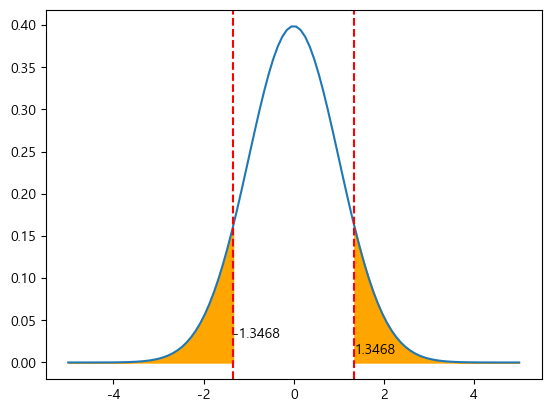

In [22]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 설명해봅니다
from scipy.stats import norm
P_true = 0.2114
col = 'isna_{}'.format(4)
P_var = P_true * (1 - P_true)
n_samples = df_basetable[col].sum()
P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
P_missing_var = P_var / n_samples
P_missing_std = P_missing_var ** 0.5

stat = -abs((P_missing_true - P_true) / P_missing_std)

plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(stat, color='red', linestyle='--')
plt.text(stat, 0.03, str(stat)[:7])
plt.axvline(-stat, color='red', linestyle='--')
plt.text(-stat, 0.01, str(-stat)[:6])
plt.fill_between(np.linspace(-5, stat, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, stat, 100)), color='orange')
plt.fill_between(np.linspace(-stat, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-stat, 5, 100)), color='orange')

plt.show()

## 단계 1-2

measuremenet_3을 포함하여 measurement_4 ~ 16까지 위 검정을 반복하고 

귀무가설을 기각할 수 있는 경우의 p-value의 합을 A라고 한다. (유의 수준은 5%로 한다.)

In [23]:
from scipy.stats import norm

p = 0.2114
mu, sigma2 = p, p * (1 - p)
ztest = list()
for i in range(3, 17):
    col = 'isna_{}'.format(i)
    X_bar = df_basetable.loc[df_basetable[col], 'failure'].mean() 
    X_bar_mu = mu
    N = df_basetable[col].sum()
    X_bar_sigma2 = sigma2 / N
    Z = -abs((X_bar - X_bar_mu) / (X_bar_sigma2 ** 0.5))
    # Z, pvalue를 넣습니다. name에 변수명을 부여합니다.
    ztest.append(
        pd.Series([Z, norm.cdf(Z) * 2], index = ['Z', 'pvalue'], name = col)
    )
df_ztest = pd.DataFrame(ztest)
df_ztest

Z    pvalue
isna_3  -2.905807  0.003663
isna_4  -1.346824  0.178037
isna_5  -2.221383  0.026325
isna_6  -0.261780  0.793491
isna_7  -0.890904  0.372981
isna_8  -0.698051  0.485145
isna_9  -0.539344  0.589650
isna_10 -0.762200  0.445940
isna_11 -0.103525  0.917546
isna_12 -0.609528  0.542174
isna_13 -0.452658  0.650795
isna_14 -0.681067  0.495829
isna_15 -0.007695  0.993860
isna_16 -0.478314  0.632427

In [24]:
# 귀무가설을 기각할 수 있는 경우의 p-value의 합을 A (유의 수준은 5%로 한다.)
display(df_ztest.query('pvalue < 0.05'))
A = df_ztest.query('pvalue < 0.05')['pvalue'].sum()
A

Z    pvalue
isna_3 -2.905807  0.003663
isna_5 -2.221383  0.026325

0.029988079249523434

**Tip** Failure, isna_{} 와 카이제곱 검정의 문제 해석을 할 수 있습니다. 둘을 비교해봅니다.

In [25]:
from scipy.stats import chi2_contingency
df_ztest.join(
    df_basetable[['isna_{}'.format(i) for i in range(3, 17)]].apply(
        lambda x: chi2_contingency(
            pd.crosstab(
                index = x, columns = df_basetable['failure']
            )
        ), axis = 0 # 각 컬럼의 값과 failure Series에서 빈도수 테이블을 만듭니다.
    ).apply(
        lambda x: pd.Series(x[:2], index = ['chi2', 'chi2_pvalue'])
    )
)

Z    pvalue      chi2  chi2_pvalue
isna_3  -2.905807  0.003663  8.172335     0.004253
isna_4  -1.346824  0.178037  1.690225     0.193571
isna_5  -2.221383  0.026325  4.825618     0.028040
isna_6  -0.261780  0.793491  0.045938     0.830288
isna_7  -0.890904  0.372981  0.738959     0.389995
isna_8  -0.698051  0.485145  0.451816     0.501474
isna_9  -0.539344  0.589650  0.259546     0.610432
isna_10 -0.762200  0.445940  0.547787     0.459223
isna_11 -0.103525  0.917546  0.005323     0.941839
isna_12 -0.609528  0.542174  0.348265     0.555097
isna_13 -0.452658  0.650795  0.191519     0.661656
isna_14 -0.681067  0.495829  0.447991     0.503291
isna_15 -0.007695  0.993860  0.000756     0.978065
isna_16 -0.478314  0.632427  0.222295     0.637297

## 단계 1-3

검정 결과 귀무가설을 기각할 수 있는 경우는 총 두 건이다. 

해당 파생 변수명의 뒷 자리 번호 순으로 na_1, na_2로 파생 변수를 만들어 **prob1** 데이터셋을 생성하라.

In [26]:
df_prob1 = df_basetable.assign(
    na_1 = lambda x: x['isna_3'],
    na_2 = lambda x: x['isna_5']
)
df_prob1.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  ...  isna_10  \
id                                                              ...            
0               7              8              4         18.040  ...    False   
1              14              3              3         18.213  ...    False   
2              12              1              5         18.057  ...    False   
3              13              2              6         17.295  ...    False   
4               9              2              8         19.346  ...    False   

    isna_11  isna_12  isna_13  isna_14  isna_15  isna_16  isna_17   na_1  \
id                                                                         
0     False    False    False     True    False    False    False  False   
1     False    False    False    False    False    False    False  False   
2      True    False    False    False    False    False    False  False   
3     False    False    False    False    False    False    False  False   
4     False    False    False    False    False    False    False  False   

     na_2  
id         
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 42 columns]

In [27]:
A, round(A, 3)

(0.029988079249523434, 0.03)

A의 값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오. 

**0.030**

# 문제 2

첫째는 스프링 개발 업체들은 실험이 제품 별로 공정하게 진행이 됐는지를 의문을 가지고 있다.

product_code에 따라 개발 업체가 다르다. 

product_code에 따라서 스프링에 가한 부하(loading)를 동일하게 했는지 조사하라.

둘째는, attribute_0와 attribute_1은 스프링을 구성하는 주요 소재이다. 

failure와는 관계가 없음이 이전에 검증되었다. 

하지만, 이에 대한 재확인 요청을 받아 attribute_0와 attribute_1은 failure와 상관없음을 확인한다.

이를 위해 다음 단계를 수행하라.


## 단계 2-1

**prob1**에서 변수 loading에 결측이 없는 행들을 뽑아 **prob2** 데이터프레임을 만든다.

Hint] prob2의 데이터 수는 21,257 이다.


In [28]:
df_prob2 = df_prob1.loc[df_prob1['loading'].notna()]
df_prob2.shape

(21257, 42)

## 단계 2-2

**prob2**에 변수 loading의 각 행들에 자연 로그 함수를 적용하여 파생 변수 loading_log를 만든다.

In [29]:
df_prob2 = df_prob2.assign(
    loading_log = lambda x: np.log(x['loading'])
)
df_prob2.head()

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                           
0             A    80.10  material_7  material_8            9            5   
1             A    84.89  material_7  material_8            9            5   
2             A    82.43  material_7  material_8            9            5   
3             A   101.07  material_7  material_8            9            5   
4             A   188.06  material_7  material_8            9            5   

    measurement_0  measurement_1  measurement_2  measurement_3  ...  isna_11  \
id                                                              ...            
0               7              8              4         18.040  ...    False   
1              14              3              3         18.213  ...    False   
2              12              1              5         18.057  ...     True   
3              13              2              6         17.295  ...    False   
4               9              2              8         19.346  ...    False   

    isna_12  isna_13  isna_14  isna_15  isna_16  isna_17   na_1   na_2  \
id                                                                       
0     False    False     True    False    False    False  False  False   
1     False    False    False    False    False    False  False  False   
2     False    False    False    False    False    False  False  False   
3     False    False    False    False    False    False  False  False   
4     False    False    False    False    False    False  False  False   

    loading_log  
id               
0      4.383276  
1      4.441356  
2      4.411949  
3      4.615813  
4      5.236761  

[5 rows x 43 columns]

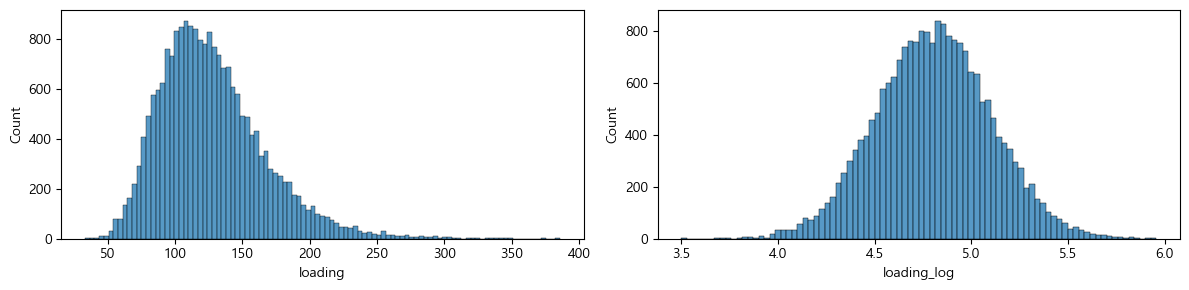

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (12, 3))
sns.histplot(df_prob2, x = 'loading', ax = axes[0])
sns.histplot(df_prob2, x = 'loading_log', ax = axes[1])
plt.tight_layout()
plt.show()

## 단계 2-3

loading_log가 product_code 각각에 대해서 정규성을 지니고 있는지 확인하고자 한다.

이를 위해 product_code 별로 loading_log에 대한 Jarque-Bera로 검정하고, 

검정 결과 정규성을 부정할 수 없는 경우의 product_code의 수를 B라고 한다.(유의 수준: 5%)

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [31]:
# 방법 1: Hard-coding
from scipy.stats import jarque_bera
# 검정 결과 정규성을 부정할 수 없는 경우의 product_code의 수를 B라고 한다.(유의 수준: 5%)
B = 3
(
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log']),
    B
)

(Jarque_beraResult(statistic=1.467731470333654, pvalue=0.4800496537264637),
 Jarque_beraResult(statistic=0.6168837955943998, pvalue=0.7345906322931469),
 Jarque_beraResult(statistic=7.536229242478234, pvalue=0.023095566154546443),
 Jarque_beraResult(statistic=0.04839464502051384, pvalue=0.9760930856160965),
 3)

In [32]:
# 방법2: groupby ~ apply 
df_jarque = df_prob2.groupby('product_code')['loading_log'].apply(
    lambda x: pd.Series(jarque_bera(x), index = ['stat', 'pvalue'])
).unstack()
display(df_jarque)
B = (df_jarque['pvalue'] >= 0.05).sum()
B

stat    pvalue
product_code                    
A             1.467731  0.480050
B             0.616884  0.734591
C             7.536229  0.023096
E             0.048395  0.976093

3

## 단계 2-4

loading_log 변수를 product_code로 구분했을 때, 

등분산성을 보이는지 Bartlett 검정을 통해 확인한다.

검정 결과에서 p-value를 C라고 한다.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [33]:
# 방법1: Hard-coding
from scipy.stats import bartlett
result2_4 = bartlett(
    df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log'],
)
C = result2_4.pvalue
C, result2_4

(0.5873433093297675,
 BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675))

In [34]:
def test(*args):
    print(len(args), args)
test('A', 'B')
test(['A', 'B'])
test(*['A', 'B'])

2 ('A', 'B')
1 (['A', 'B'],)
2 ('A', 'B')


In [35]:
# 방법2: groupby ~ agg list ~ list unpacking
from scipy.stats import bartlett

# agg ~ list로 product_code에 따라 loading_log을 하나의 리스트에 모아, product_code 별로 모아진 loading_log들의 리스트를
# list unpacking으로 bartlett 함수에 전달합니다.
result2_4 = bartlett(
    *df_prob2.groupby('product_code')['loading_log'].agg(list)
)
C = result2_4.pvalue
C, result2_4

(0.5873433093297675,
 BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675))

## 단계 2-5

product_code에 대한 분산분석(ANOVA)을 통해서 loading_log 평균에 차이가 있는지 검정한다.

그 결과 중 p-value를 D라고 한다.

---

**함수 가이드**

 scipy.stats 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [36]:
from scipy.stats import f_oneway
result2_5 = f_oneway(
    *df_prob2.groupby('product_code')['loading_log'].agg(list)
)
D = result2_5.pvalue
D, result2_5

(0.7733782072320899,
 F_onewayResult(statistic=0.37177284134760413, pvalue=0.7733782072320899))

**Tip** 일원분산분석을 직접해봅니다.

In [37]:
from scipy.stats import f
# H0: 모집단 별 모평균은 같다 => 범주형 변수의 가변수 구성한 선형회귀는 무의미하다, H1: 같지 않다. => 유의미하다.
# F = MSR / MSE
n, k = len(df_prob2), df_prob2['product_code'].nunique()
# MSR = SSR / (k - 1)
# MSE = SSE / (n - k)
# SST = SSR + SSE 
# s_mean = df_prob2.groupby('product_code')['loading_log'].mean()
# y_hat = df_prob2['product_code'].map(s_mean)
y_hat = df_prob2.groupby('product_code')['loading_log'].transform(lambda x: x.mean())
y_true = df_prob2['loading_log']
y_bar = y_true.mean()
SSR = ((y_hat - y_bar) ** 2).sum()
SSE = ((y_true - y_hat) ** 2).sum()
SST = ((y_true - y_bar) ** 2).sum()
MSR = SSR / (k - 1)
MSE = SSE / (n - k)
# SST의 자유도 = SSR의 자유도 + SSE의 자유도  n - 1 = (k - 1) + (n - k)
F = MSR / MSE
F,  f.sf(F, k - 1, n - k), SST,  SSR + SSE # statistic=0.37177284134760413, pvalue=0.7733782072320899

(0.3717728413476142,
 0.7733782072320899,
 1879.1520065602526,
 1879.1520065602529)

## 단계 2-6

카이제곱검정을 통해 attribute_0, attribute_1의 결합값이 failure와 연관이 있는지 조사하라. 

attribute_0, attribute_1의 결합값의 의미 attribute_0=material_7, attribute_1=material_8 이라면, 이 둘의 결합값은
matertial_7material_8를 의미한다.

(유의 수준 1%) 연관이 있다면 E값은 1 없으면 0으로 한다.

---

**함수 가이드**

 scipy.stats.chi2_contingency, correction=False
 
 문제 지시사항 외 Default 값 사용
 
---


In [38]:
from scipy.stats import chi2_contingency
result_2_6 = chi2_contingency(
    pd.crosstab(
        index = df_prob2['attribute_0'] + df_prob2['attribute_1'],
        columns = df_prob2['failure']
    ), correction=False
)
result_2_6

(7.0400463075335615,
 0.029598749837407304,
 2,
 array([[4106.03584702, 1102.96415298],
        [4162.79042198, 1118.20957802],
        [8487.17373101, 2279.82626899]]))

In [39]:
# (유의 수준 1%) 연관이 있다면 E값은 1 없으면 0으로 한다
# H0: 독립이다=>연관 X => 0. H1: 독립이 아니다 => 연관 O => 1
E = 0 if result_2_6[1] >= 0.01 else 1
E

0

**Tip!** $Chi^2$ 검정도 직접해봅니다.

$chi2 = \sum_{i,j}\frac{(E_{ij} - O_{ij})^2}{E_{ij}}$

$p(X=x_i, Y=y_j) = p(X=x_i) p(Y=y_j)$

In [40]:
from scipy.stats import chi2
s_attr01 = df_prob2['attribute_0'] + df_prob2['attribute_1']

# 귀무가설이 맞다라는 가정에서 각 케이스의 확률을 얻을 수 있습니다.
# 각 변수의 빈도수와 비율 이용하여 행렬곱을 통해 빈도수 테이블을 만듭니다
df_E = s_attr01.value_counts(normalize = True).rename('val').to_frame().dot(
    df_prob2['failure'].value_counts(normalize = False).rename('val').to_frame().T
)
df_O = pd.crosstab(
    index = s_attr01, columns = df_prob2['failure']
)
Chi2 = ((df_E - df_O) ** 2 / df_E).sum().sum()
# 자유도 = (변수1의 범주수 - 1) × (변수2의 범주수 - 1)
dof = (s_attr01.nunique() - 1) * (df_prob2['failure'].nunique() - 1)
Chi2, chi2.sf(Chi2, dof), dof, df_E # 7.0400463075335615, 0.029598749837407304

(7.040046307533586,
 0.029598749837406936,
 2,
                                 0            1
 material_7material_8  8487.173731  2279.826269
 material_7material_6  4162.790422  1118.209578
 material_5material_5  4106.035847  1102.964153)

In [41]:
B, C, D, E, B + C + D + E, round(B + C + D + E, 2)

(3, 0.5873433093297675, 0.7733782072320899, 0, 4.360721516561858, 4.36)

B + C + D + E의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 출력하시오.

**4.36**

# 문제 3

로지스틱 회귀모델로 수치형 변수 measurement_0 ~ 17, 

loading과 이진형인 na_1, na_2 중에서 최적의 성능을 보이는 입력 변수들을 찾고자 한다.


## 단계 3-1

**prob1**을 복사하여 **prob3**을 만든다. loading의 결측치는 loading의 평균으로 대치한다.  

In [42]:
df_prob3 = df_prob1.assign(
    loading = lambda x: x['loading'].fillna(x['loading'].mean())
)
df_prob3['loading'].isna().sum()

0

## 단계 3-2: 
    
**prob3**을 80%는 학습데이터 **prob3_train**으로 20%는 테스트데이터 **prob3_test**로 나눈다. 

**prob3_train**의 failure가 1인 비율과 **prob3_test**의 failure가 1의 비율을 동일하게 한다.


---

**함수 가이드**

 sklearn.model_selection.train_test_split, random_state=123, 
 
 train과 test의 failure의 비율은 stratify 매개 변수를 이용하여 맞춘다.
 
 문제 지시사항 외 Default 값 사용
 
---

In [43]:
from sklearn.model_selection import train_test_split# , random_state=123

# train과 test의 failure의 비율은 stratify
df_prob3_train, df_prob3_test = train_test_split(
    df_prob3, train_size = 0.8, random_state = 123, stratify = df_prob3['failure']
)
# train_test_split에서는 reference DataFrame을 반환합니다. 정상적인 데이터 변경작업이 되도록 copy()를 해줍니다.
df_prob3_train, df_prob3_test = df_prob3_train.copy(), df_prob3_test.copy()

In [44]:
pd.concat([
    df_prob3_train['failure'].value_counts(normalize=True).rename('train'),
    df_prob3_test['failure'].value_counts(normalize=True).rename('test')
], axis=1)

train      test
0  0.788535  0.788677
1  0.211465  0.211323

## 단계 3-3

**prob3_train**의 수치형 입력 변수 loading, measurement_0 ~ 17을 표준 정규화한다. 

**prob3_train**의 표준 정규화 설정으로 **prob3_test**의 loading, measurement_0 ~ 17에도 적용한다. 

표준화 처리한 **prob3_train**과 **prob3_test**는 문제 4와 문제 5에서 사용한다.


---

**함수 가이드**

 sklearn.preprocessing 제공 기능 활용, 
 
 문제 지시사항 외 Default 값 사용
 
---


In [45]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = ['loading'] + ['measurement_{}'.format(i) for i in range(18)]
df_prob3_train[X_std] = std_scaler.fit_transform(df_prob3_train[X_std])
df_prob3_test[X_std] = std_scaler.transform(df_prob3_test[X_std])

## 단계 3-4
    
로지스틱 회귀모델을 사용하여 loading, measurement_0~17과 na_1, na_2를 입력 변수로 하여 **prob3_train**을 학습한다. 

로지스틱 회귀모델을 **prob3_test**로 성능을 측정한 값을 A라고 한다.

입력 변수: loading, measurement_0~17, na_1, na_2

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---

**함수 가이드**

 sklearn.linear_model.LogisticRegression, solver='lbfgs', 문제 지시사항 외 Default 값 사용
 
 sklearn.metrics.roc_auc_score
 
---

In [46]:
# 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression # , solver='lbfgs'
# 성능 지표: AUC(area under of ROC curve)
from sklearn.metrics import roc_auc_score

# loading, measurement_0~17과 na_1, na_2를 입력 변수로 하여 prob3_train을 학습한다.
X_lr = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
clf_lr = LogisticRegression(solver='lbfgs')
# failure
clf_lr.fit(df_prob3_train[X_lr], df_prob3_train['failure'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
clf_lr.predict_proba(df_prob3_test[X_lr])

array([[0.83018817, 0.16981183],
       [0.83607404, 0.16392596],
       [0.69631689, 0.30368311],
       ...,
       [0.82246772, 0.17753228],
       [0.80237978, 0.19762022],
       [0.76532997, 0.23467003]])

In [48]:
# 로지스틱 회귀모델을 prob3_test로 성능을 측정한 값을 A

# 기본적으로 Positive는 1입니다. 1인 확률은 1번 컬럼에 있습니다.
A = roc_auc_score(
    df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1]
)
A

0.5792951262053387

In [49]:
# roc_auc_score는 순위기반 지표입니다.
# 대소관계가 같으면 결과는 같습니다.
# LogisticRegression의 decision_function으로 로짓을 구할 수 있습니다.
# 로짓은 Positive 확률과 대소관계가 같습니다.

roc_auc_score(
    df_prob3_test['failure'], clf_lr.decision_function(df_prob3_test[X_lr]) # Logit
)


0.5792951262053387

In [50]:
# Logistic Regression의 decision_function method는 Logit을 반환합니다.
clf_lr.decision_function(df_prob3_test[X_lr])

array([-1.58696141, -1.62930234, -0.8298201 , ..., -1.53315677,
       -1.40123492, -1.18212665])

In [51]:
# Logit = np.log(p / (1 - p))
np.log(clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1] / (1 - clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1]))

array([-1.58696141, -1.62930234, -0.8298201 , ..., -1.53315677,
       -1.40123492, -1.18212665])

In [52]:
roc_auc_score(
    df_prob3_test['failure'], df_prob3_test['loading']
)

0.5778277926972065

In [53]:
# 사전 지식이 없다면, 어떻게 가장 failure를 나타내는 feature를 찾아볼수 있을까요?
from scipy.stats import mannwhitneyu
df_prob3_train[['measurement_{}'.format(i) for i in range(18)] + ['loading']].apply(
    lambda x: mannwhitneyu(
        x.loc[df_prob3_train['failure'] == 0], 
        x.loc[df_prob3_train['failure'] == 1], alternative = 'two-sided'
    ).pvalue
).sort_values(ascending = True).iloc[:5]

loading           1.232029e-60
measurement_17    4.723594e-03
measurement_1     2.660428e-02
measurement_8     5.800023e-02
measurement_6     6.186464e-02
dtype: float64

In [54]:
# Positive: Apple, Negative: Banana
# predict_proba의 class 별 확률순서는 사전순입니다.
# 따라서 Apple일 확률은 첫 번째 열에 있습니다.
# roc_auc_score(
#    df_prob3_test['target'] == 'Apple', clf_lr.predict_proba(df_prob3_test[X_lr])[:, 0]
#)
# failure가 0이 Positive라면
roc_auc_score(
    df_prob3_test['failure'] == 0, clf_lr.predict_proba(df_prob3_test[X_lr])[:, 0]
)

0.5792951262053387

In [55]:
# ROC AUC를 직접 구해봅니다. 
# score를 기준으로 내림차순 정렬을 합니다,
# Positive 분리점을 아래로 이동시키면서  FPR, TPR을 구합니다. 
# 이를 위해 true/false의 합으로 count를 구하는 것과 cumsum을 
# 이용하여 FP와 TP을 결정 포인트별로 구합니다.
df_prob3_test[['failure']].assign(
    score = clf_lr.decision_function(df_prob3_test[X_lr]) # LogisticRegression의 decision_function은 Logit 출력
).sort_values('score', ascending=False).assign(
    fp=lambda x: (1 - x['failure']).cumsum(), 
    tp=lambda x: (x['failure']).cumsum(),
).assign(
    fpr=lambda x: x['fp'] / (1 - x['failure']).sum(),
    tpr=lambda x: x['tp'] / (x['failure']).sum(),
).head(15)

failure     score  fp  tp       fpr       tpr
id                                                  
15595        0  0.260521   1   0  0.000295  0.000000
11792        0  0.204845   2   0  0.000591  0.000000
14732        0  0.124153   3   0  0.000886  0.000000
11896        0  0.086665   4   0  0.001182  0.000000
4568         1  0.051830   4   1  0.001182  0.001103
13048        1  0.000578   4   2  0.001182  0.002205
10831        1 -0.012503   4   3  0.001182  0.003308
13540        0 -0.029304   5   3  0.001477  0.003308
11248        1 -0.075086   5   4  0.001477  0.004410
15699        0 -0.084708   6   4  0.001773  0.004410
9201         0 -0.112592   7   4  0.002068  0.004410
24039        0 -0.118118   8   4  0.002363  0.004410
24280        1 -0.143558   8   5  0.002363  0.005513
5715         1 -0.156398   8   6  0.002363  0.006615
976          0 -0.163632   9   6  0.002659  0.006615

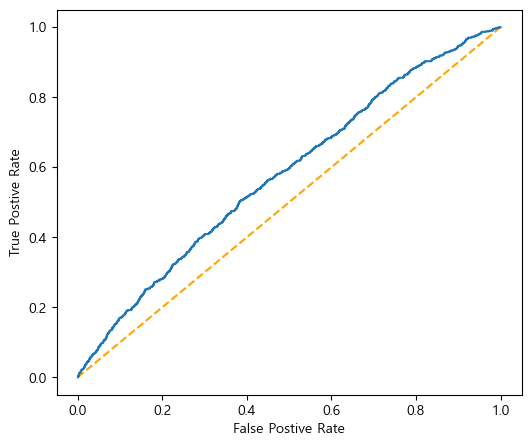

In [56]:
# ROC AUC를 그려봅니다.
# 이 때 logit으로 구해 보겠습니다.
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
df_prob3_test[['failure']].assign(
    score = clf_lr.decision_function(df_prob3_test[X_lr])
).sort_values('score', ascending=False).assign(
    fpr=lambda x: (1-x['failure']).cumsum() / (1 - x['failure']).sum(),
    tpr=lambda x: (x['failure']).cumsum() / ( x['failure']).sum(),
).pipe(
    lambda x: plt.plot(x['fpr'], x['tpr'])
)
plt.gca().set_xlabel('False Postive Rate')
plt.gca().set_ylabel('True Postive Rate')
plt.show()

In [57]:
# ROC AUC의 실제 값을 구해봅니다. 
df_prob3_test[['failure']].assign(
    score = clf_lr.decision_function(df_prob3_test[X_lr])
).sort_values('score', ascending=False).assign(
    fpr=lambda x: (1 - x['failure']).cumsum() / (1 - x['failure']).sum(),
    tpr=lambda x: (x['failure']).cumsum() / ( x['failure']).sum(),
).assign(
    fpr_1 = lambda x: x['fpr'].shift(1).fillna(0) # 곡선아래의 면적을 구하기 위해 곡선을 구성하는 미세사각형의 너비를 구합니다.
).assign(
    sq = lambda x: (x['fpr'] - x['fpr_1']) * x['tpr'] # 각 미세사각형의 면적입니다.
)['sq'].sum() # 0.5792951262053387

0.5792951262053387

## 단계 3-5

로지스틱 회귀모델을 웨퍼(Wrapper)로 사용하고, loading, measurement_0 ~ 17, na_1, na_2를 후보 입력 변수로 한다. 

전진 선택법을 사용하여 이 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 

전진 선택법의 선택 기준은 **prob3_train**을 대상으로 5겹 층화교차검증(5-Fold stratified cross validation)의 성능 측정 결과를 기준으로 한다. 

전진 선택 과정에서 선택했던 변수를 제외하지 않는다. 

입력 변수: 본 단계 요건 참고

대상 변수: failure 

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

mlxtend.feature_selection.SequentialFeatureSelector

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

문제 지시사항 외 Default 값 사용

---

In [58]:
from sklearn.linear_model import LogisticRegression # , solver='lbfgs'
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold # , random_state=123, shuffle=True

X_sfs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
sfs = SequentialFeatureSelector(
    estimator=LogisticRegression(solver = 'lbfgs'), # 로지스틱 회귀모델을 웨퍼(Wrapper)
    forward = True, # 전진 선택법을 사용하여 
    k_features = 'best', # 이 후보 입력 변수 중에서 최적의 성능
    floating = False, # 전진 선택 과정에서 선택했던 변수를 제외하지 않는다.
    scoring = 'roc_auc', # 성능 지표: AUC
    cv = StratifiedKFold(5, random_state=123, shuffle=True)
)
sfs.fit(df_prob3_train[X_sfs], df_prob3_train['failure'])

c:\users\강선구\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


SequentialFeatureSelector(clone_estimator=True,
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, 

In [59]:
X_sfs_best = sfs.k_feature_names_
X_sfs_best, sfs.k_score_#, sfs.subsets_ 

(('loading',
  'measurement_1',
  'measurement_4',
  'measurement_14',
  'measurement_17',
  'na_1'),
 0.5917537024093409)

## 단계 3-6

단계 3-5에서 찾은 최적의 입력 변수 조합으로 로지스틱 회귀모델을 사용하여 **prob3_train**을 학습하고 

**prob3_test**로 성능을 측정한 값을 B라고 한다.

입력 변수: **단계 3-5**에서 도출한 최적의 입력 변수 조합

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수 가이드**

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

문제 지시사항 외 Default 값 사용

---

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score # 성능 지표: AUC

X_lr = list(X_sfs_best)
clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(df_prob3_train[X_lr], df_prob3_train['failure'])
B = roc_auc_score(df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1])
(
    B,
    roc_auc_score(df_prob3_train['failure'], clf_lr.predict_proba(df_prob3_train[X_lr])[:, 1])
) # 0.5792951262053387

(0.5838326230092876, 0.5936682060775388)

In [61]:
A, B, A - B, round(A - B, 3)

(0.5792951262053387, 0.5838326230092876, -0.004537496803948882, -0.005)

A-B값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오

**-0.005**

**Tip**: 내장 모델이 아니라 custom model을 사용해서도 feature selector를 사용할 수 있나요?

Logistic Regression을 직접 구현한 LogisticRegressionCustom을 만들어 보이겠습니다.

이를 구현하기 위한 sklearn에서 사용하는 손실 함수를 봅니다.

[Logistic Regression 가이드](https://scikit-learn.org/0.21/modules/linear_model.html#logistic-regression)

$\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

$\tilde{X} =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} & 1 \\
x_{21} & x_{22} & \cdots & x_{2d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} & 1
\end{bmatrix}
, $
$\tilde{w} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_d \\
c
\end{bmatrix}
$

$\min_{w} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (\tilde{X_i}^T \tilde{w})) + 1)$

$y_i \in {-1, 1}$

$\begin{aligned}
L(\tilde{w}) &= \min_{\tilde{w}} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (\tilde{X_i}^T \tilde{w})) + 1) \\
z &= \tilde{X} \tilde{w} \\
m &= -y \circ z \\
p &= \frac{1}{1 + \exp(-m)} \\
\nabla_\tilde{w} L &= \begin{bmatrix} w \\ 0 \end{bmatrix} - C \cdot  (y \circ p) \tilde{X}
\end{aligned}$

In [62]:
# 시그모이드 함수
def sigmoid(logit):
    return 1 / (1 + np.exp(-logit))

# 손실 함수
def loss_function(w_tilde, X_tilde, y, C = 1):
    z = X_tilde.dot(w_tilde)
    log_exp = np.log(1 + np.exp(-y * z))
    w = w_tilde[:-1]
    reg = 0.5 * np.dot(w, w)
    return reg + C * np.sum(log_exp)

# 손실 함수의 그래디언트
def gradient(w_tilde, X_tilde, y, C = 1):
    grad_reg = np.concatenate([w_tilde[:-1], [0]]) 
    z = X_tilde.dot(w_tilde)
    m = -y * z
    p = sigmoid(m)
    grad = - C * (y * p).dot(X_tilde)
    return grad + grad_reg

In [63]:
from scipy.optimize import minimize

class LogisticRegressionCustom:
    def __init__(self, C = 1):
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_tilde = np.hstack([X, np.ones((n_samples, 1))]).astype('float')  # 모두가 1인 상수항을 추가 합니다
        y = y * 2 - 1 # y가 -1, 1이 되도로 합니다.
        w_init = np.zeros(n_features + 1, dtype = 'float') #  w and c가 포함된 w_tilde를 추기화합니다. 
        # 위에서구한 손실 함수와 경사도 함수를
        # scipy.optimize.minimize 를 이용하여, w_tilde를 구합니다.
        result = minimize(
            loss_function,
            w_init,
            args=(X_tilde, y, self.C),
            method='L-BFGS-B', # LogisticRegression의 lgfgs solver를 사용합니다.
            jac=gradient # Jacobian Matrix 행렬 단위의 1차 도함수를 말합니다.
        )
        self.coef_ = result.x[:-1]
        self.intercept_ = result.x[-1]

    def predict_proba(self, X):
        prob =  sigmoid(X.astype('float').dot(self.coef_) + self.intercept_)
        return np.vstack([1 - prob, prob]).T

    def predict(self, X):
        prob =  sigmoid(X.dot(self.coef_) + self.intercept_)
        return (prob >= 0.5).astype(int)
    
    def get_params(self, deep = True):
        return {
            'C': self.C
        }

In [64]:
from sklearn.metrics import roc_auc_score # AUC
# loading, measurement_0~17과 na_1, na_2
X_lr = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
clf_lrc = LogisticRegressionCustom()
clf_lrc.fit(df_prob3_train[X_lr].values, df_prob3_train['failure'].values)
roc_auc_score(
    df_prob3_test['failure'], clf_lrc.predict_proba(df_prob3_test[X_lr].values)[:, 1]
) # 0.5792951262053387

0.5792951262053387

In [65]:
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector

# loading, measurement_0 ~ 17, na_1, na_2
X_sfs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
sfs = SequentialFeatureSelector(
    estimator = LogisticRegressionCustom(), # fit, predict_proba, predict, get_params 메소드로 구현하면 가능합니다.
    forward = True, # 전진 선택법을 사용
    k_features = 'best', # 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수
    cv = StratifiedKFold(5, random_state = 123, shuffle = True), # 5겹 층화교차검증(5-Fold stratified cross validation)의 성능 측정 결과
    floating = False, # 선택했던 변수를 제외하지 않는다.
    scoring = 'roc_auc'# AUC
)
sfs.fit(df_prob3_train[X_sfs], df_prob3_train['failure'])
"""(['loading',
  'measurement_1',
  'measurement_4',
  'measurement_14',
  'measurement_17',
  'na_1'],
 0.5917537024093409)
"""
sfs.k_feature_names_, sfs.k_score_

(('loading',
  'measurement_1',
  'measurement_4',
  'measurement_14',
  'measurement_17',
  'na_1'),
 0.5917537024093409)

# 문제 4

차원 축소 기법을 통한 데이터의 특성을 파악하고, 또한 failure 분류 성능을 높힐 만한 요소를 살펴 본다. 

measurement_0 ~ 17를 변수셋을 **X_4**로 지정한다.

첫째로, loading을 제외하고, 변수셋 **X_4**을 입력으로 failure를 대상 변수로 Linear Discrimant Analysis(LDA) 모델을 만든다. 

True/False 이진 변수인 failure를 분류한다는 점에서 LDA 모델은 변수셋 **X_4**를 한 개의 경계점으로 

failure를 최대한 정확하게 구분하도록 하나의 연속형 변수로 변환한다. 

스프링의 내구력이 높을 수록 failure 확률이 낮아진다면, LDA 변환값은 스프링의 내구력을 나타낸다라고 할 수 있다.

실험에서 스프링에 가한 부하(loading)와  LDA 변환값의 상관도를 측정하여, 

변수셋 **X_4** 에서 예상되는 내구력이 스프링에 따라 부하(loading)의 반영 정도를 가늠한다.

둘째로, PCA를 사용하여 차원 감소로 failure 분류 성능에 얼마나 효과가 있을지 살펴본다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준 정규화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.


In [66]:
X_4 = ['measurement_{}'.format(i) for i in range(18)]
np.array(X_4)

array(['measurement_0', 'measurement_1', 'measurement_2', 'measurement_3',
       'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
       'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17'], dtype='<U14')

## 단계 4-1

**prob3_train**에서 변수셋 **X_4**를 입력으로 failure를 대상 변수로 하여 LDA(Linear Discriminant Analysis) 모델을 학습한다. 

변수셋 **X_4**의 **prob3_train**에서의 LDA의 변환값과 loading과 스피어만 상관도 (spearman correlation)의 p-value를 구하여 A라고 한다.

입력 변수] 변수셋 **X_4**, 입력 변수의 순서는 measurement_ 이후 숫자의 오름차순

대상 변수] failure

---
**함수가이드**

sklearn.discriminant_analysis 제공 기능 활용

scipy.stats.spearmanr

문제 지시사항 외 Default 값 사용

---

In [67]:
 # LDA(Linear Discriminant Analysis) 모델
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# prob3_train에서 변수셋 X_4를 입력으로 failure를 대상 변수로 
lda.fit(df_prob3_train[X_4], df_prob3_train['failure'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [68]:
from scipy.stats import spearmanr
# LDA의 변환값과 loading과 스피어만 상관도 (spearman correlation)의 p-value를 구하여 A
result_4_1 = spearmanr(
    # LDA는 예측과 변환을 제공해줍니다. lda.predict / lda.transform
    lda.transform(df_prob3_train[X_4]), df_prob3_train['loading']
)
A = result_4_1.pvalue
A, result_4_1

(0.6995009550811424,
 SpearmanrResult(correlation=0.0029462997112993335, pvalue=0.6995009550811424))

**Q** lda 변환값과 failure와의 유의미성은 어떻게 확인 할 수 있을 까요?

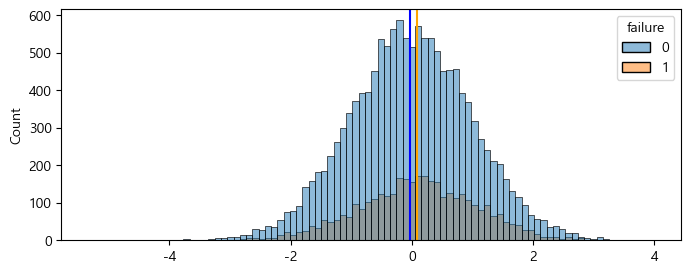

In [69]:
# failure별 LDA의 히스토그램을 그려봅니다.
plt.figure(figsize=(8, 3))
l = lda.transform(df_prob3_train[X_4])
sns.histplot(x=l[:, 0], hue=df_prob3_train['failure'])
plt.axvline(l[df_prob3_train['failure'] == 0].mean(), color='blue')
plt.axvline(l[df_prob3_train['failure'] == 1].mean(), color='orange')
plt.show()

In [70]:
# Answer: T-검정을 사용해볼만 합니다. 
from scipy.stats import ttest_ind, bartlett

lda_value = lda.transform(df_prob3_train[X_4])[:, 0]
lda_true = lda_value[df_prob3_train['failure'] == 1]
lda_false = lda_value[df_prob3_train['failure'] == 0]

equal_var = 1 if bartlett(lda_true, lda_false).pvalue >= 0.05 else 0
ttest_ind(lda_true, lda_false, equal_var=equal_var)

Ttest_indResult(statistic=5.927378456131373, pvalue=3.1370243739954236e-09)

In [71]:
# 비모수 방법인 mannwhiteny 또한 사용해볼만 하겠지요
from scipy.stats import mannwhitneyu

lda_value = lda.transform(df_prob3_train[X_4])[:, 0]
mannwhitneyu(
    lda_value[df_prob3_train['failure'] == 1],
    lda_value[df_prob3_train['failure'] == 0]
)

MannwhitneyuResult(statistic=22895846.0, pvalue=1.4282689236218276e-10)

## 단계 4-2

**prob3_train**에서 measurement_0 ~ 17을 대상으로 주성분분석(Principal Component Analysis, PCA) 모델을 학습한다. 

분산 설명율이 높은 순으로 주성분 변환한 변수명을 pca_0 ~ 17하여 **prob3_train**에 추가하여 **prob4_train**을 만든다. 

**prob3_test**에 **prob3_train**를 학습했던 PCA 모델로 동일한 방법으로 pca_0 ~17 파생 변수를 추가하여 **prob4_test**를 만든다.

입력 변수] 변수셋 **X_4**, 입력 변수의 순서는 measurement_ 이후 숫자의 오름차순

---
**함수가이드**

sklearn.decomposition.PCA, random_state=123

문제 지시사항 외 Default 값 사용

---


In [72]:
from sklearn.decomposition import PCA # , random_state=123
pca = PCA(n_components=None, random_state=123)
pca.fit(df_prob3_train[X_4])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
# 분산 설명율이 높은 순으로 주성분을 변수명을 pca_0 ~ 17
X_comp = ['pca_{}'.format(i) for i in range(18)]
# 복수의 변수를 추가하는 가장 효과적인 방법
# 생성할 변수들을 DataFrame으로 만들어 index와 컬럼명을 주고
# join을 통해 결합합니다.
df_prob4_train = df_prob3_train.join(
    pd.DataFrame(
        pca.transform(df_prob3_train[X_4]), index = df_prob3_train.index, columns = X_comp
    )
)
df_prob4_test= df_prob3_test.join(
    pd.DataFrame(
        pca.transform(df_prob3_test[X_4]), index = df_prob3_test.index, columns = X_comp
    )
)

display()
df_prob4_test.head()

product_code   loading attribute_0 attribute_1  attribute_2  \
id                                                                  
6626             B -0.646778  material_5  material_5            8   
6302             B -0.776364  material_5  material_5            8   
2068             A  1.220389  material_7  material_8            9   
4661             A  0.213270  material_7  material_8            9   
10303            B  0.694332  material_5  material_5            8   

       attribute_3  measurement_0  measurement_1  measurement_2  \
id                                                                
6626             8      -0.779343      -0.210286       0.912362   
6302             8      -0.308363       0.509078       1.216412   
2068             5       1.104580      -1.409226      -0.911937   
4661             5      -0.072872      -1.169438      -0.607887   
10303            8      -0.072872      -0.689862       0.304263   

       measurement_3  ...     pca_8     pca_9    pca_10    pca_11    pca_12  \
id                    ...                                                     
6626        0.694817  ... -0.435347 -2.451195 -0.212859 -0.474401 -0.152049   
6302       -1.793689  ...  0.600191 -1.158239 -1.832178 -1.066241 -1.273782   
2068        0.082494  ...  0.442147 -1.731923 -0.481832  0.195241  0.004504   
4661        0.287607  ...  1.318845 -0.761127  1.713534 -1.731517  1.039950   
10303       1.477063  ...  0.507550  0.996317  1.105341 -0.423133  1.067850   

         pca_13    pca_14    pca_15    pca_16    pca_17  
id                                                       
6626   0.415381 -0.211874  1.251870 -0.318274 -0.142292  
6302   0.121801  1.330900 -0.396394  0.157529 -0.862240  
2068  -0.244213 -2.249243  0.099636 -0.293499 -0.412578  
4661  -2.236054  0.923431 -1.178613 -1.247759  0.304439  
10303  0.665243 -1.121216  0.637357 -0.238106  0.043725  

[5 rows x 60 columns]

**Tip: PCA에 대해 더 살펴봅니다.**

In [74]:
# 분산 설명력 -> 공분산 행렬의 고윳값
pca.explained_variance_

array([1.85613793, 1.41894459, 1.25547315, 1.1632852 , 1.06637856,
       1.05000212, 1.01995967, 1.00922255, 1.00657757, 0.99213623,
       0.98552903, 0.97614082, 0.97170312, 0.87532548, 0.81399432,
       0.70771288, 0.67969009, 0.15283534])

In [75]:
# df_prob3_train[X_4].cov()
# 공분산 행렬 만들기: 중심평균화 -> 행렬곱 -> 표본수 - 1 (표본공분산)
df_cov = (df_prob3_train[X_4] - df_prob3_train[X_4].mean()).pipe(
    lambda x: x.T.dot(x) / (len(x) - 1)
)
# np.linalg.eig(df_cov)  고윳값 분해
# 대칭행렬은 np.linalg.eigh 로 더 효율적으로 고윳값 분해를 할 수 있습니다.
ev, emat = np.linalg.eigh(df_cov)
ev[np.argsort(-ev)]

array([1.85613793, 1.41894459, 1.25547315, 1.1632852 , 1.06637856,
       1.05000212, 1.01995967, 1.00922255, 1.00657757, 0.99213623,
       0.98552903, 0.97614082, 0.97170312, 0.87532548, 0.81399432,
       0.70771288, 0.67969009, 0.15283534])

In [76]:
df_emat = pd.DataFrame(
    pca.components_, index = ['evec{}'.format(i) for i in range(1, 19)], columns = X_4
)
df_emat

measurement_0  measurement_1  measurement_2  measurement_3  \
evec1        0.022883      -0.019582      -0.015097       0.050394   
evec2        0.526517      -0.562470      -0.103690       0.016855   
evec3       -0.186391       0.074810       0.142814       0.003889   
evec4       -0.352613       0.330151      -0.080426       0.003231   
evec5        0.029019      -0.105361       0.113744      -0.060397   
evec6       -0.267111      -0.062494       0.659857       0.210428   
evec7        0.001058       0.109837      -0.244030       0.502298   
evec8       -0.060505      -0.035790       0.260950      -0.337998   
evec9        0.007082      -0.042138       0.110591      -0.228984   
evec10      -0.007179       0.036969      -0.168208       0.280662   
evec11      -0.030856      -0.012127       0.028821       0.347170   
evec12      -0.055118       0.073923      -0.164065      -0.564637   
evec13       0.054462      -0.208127       0.460676       0.099347   
evec14       0.126217      -0.151632       0.127489       0.037287   
evec15       0.063697       0.013026       0.124078      -0.002254   
evec16      -0.187835      -0.001980      -0.040303      -0.006651   
evec17       0.651904       0.681946       0.269061       0.001451   
evec18       0.004430       0.003104       0.000078      -0.028615   

        measurement_4  measurement_5  measurement_6  measurement_7  \
evec1        0.204060       0.371117       0.190529       0.268949   
evec2       -0.042447       0.036740       0.000815       0.021352   
evec3        0.052836       0.007751       0.029356      -0.016607   
evec4        0.040330       0.037848      -0.021599      -0.027172   
evec5        0.193537       0.099383      -0.088444      -0.137312   
evec6       -0.196963       0.108322       0.070451       0.241535   
evec7        0.536801       0.234953      -0.118318      -0.203609   
evec8        0.205978       0.106405      -0.653943      -0.359636   
evec9        0.021452       0.611846       0.240576      -0.283762   
evec10       0.000296       0.046954      -0.516073       0.477417   
evec11       0.109553      -0.312179       0.306829      -0.438902   
evec12       0.439765      -0.237465       0.182878       0.285884   
evec13       0.544672      -0.309550       0.049135       0.146230   
evec14      -0.042637       0.078385      -0.132493       0.011286   
evec15       0.014269       0.013684       0.025779       0.028368   
evec16      -0.010939      -0.019940       0.005683      -0.005373   
evec17      -0.005318      -0.005411       0.005299       0.020747   
evec18      -0.201527      -0.371899      -0.188291      -0.269484   

        measurement_8  measurement_9  measurement_10  measurement_11  \
evec1        0.427064       0.164705       -0.009905       -0.022599   
evec2       -0.059520      -0.001804        0.008022        0.245695   
evec3        0.031873      -0.022902       -0.092871        0.365114   
evec4       -0.029152      -0.004636       -0.226711        0.441333   
evec5       -0.036919      -0.053795       -0.701265        0.072859   
evec6       -0.197077      -0.001331       -0.023974       -0.133090   
evec7       -0.392317       0.188402        0.032372       -0.152960   
evec8        0.323277       0.090250        0.186578       -0.080167   
evec9       -0.246375      -0.536676        0.204646        0.066616   
evec10       0.085181      -0.613134        0.039458        0.018145   
evec11       0.476237      -0.431393       -0.059659       -0.100561   
evec12      -0.134433      -0.220107       -0.113209       -0.174150   
evec13      -0.095064      -0.032163        0.230213        0.231660   
evec14       0.011113      -0.045469       -0.504710       -0.079011   
evec15      -0.052082      -0.038355       -0.155556       -0.631277   
evec16       0.011313      -0.003969        0.140894       -0.227613   
evec17       0.009840      -0.028310        0.003456        0.052519   
evec18      -0.434346      -0.147970       -0.0019

In [77]:
# Q: 첫 번째 주성분의 영향력이 가장 큰 변수는 무엇가요?
df_emat.loc['evec1'].abs().idxmax()

'measurement_17'

In [78]:
# PCA 변환 과정은 입력 변수를 평균중심화를 하고, 성분에 해당하는 고유벡터와의 내적을 통해 얻을 수 있습니다.
# 제1주성분을 직접 구해봅니다: (X - X_mean).dot(제1주성분 고유벡터) 
# 그리고 pca transform으로 나온 결과와 비교합니다.
pd.concat([
    (df_prob3_test[X_4] - df_prob3_train[X_4].mean()).dot(
        df_emat.loc['evec1']
    ).rename('pca_0_direct'),
    df_prob4_test['pca_0']
], axis=1)

pca_0_direct     pca_0
id                           
6626       0.565761  0.565761
6302       0.321466  0.321466
2068       1.897359  1.897359
4661       0.913880  0.913880
10303      0.420705  0.420705
...             ...       ...
7731      -3.530324 -3.530324
13022     -0.758634 -0.758634
9559      -0.320441 -0.320441
10604     -0.392752 -0.392752
22261      3.255263  3.255263

[4292 rows x 2 columns]

In [79]:
# PCA 역변환을 해봅니다.
# 역변환의 공식을 바꿀 수 있으니 직접수행하는 것도 숙지가 필요합니다.
pd.concat([
    (df_prob4_test[X_comp].dot(df_emat['measurement_0'].values) + df_prob3_train['measurement_0'].mean()).rename('measurement_0_inv_direct'),
    pd.Series(pca.inverse_transform(df_prob4_test[X_comp])[:, 0], index = df_prob4_test.index, name = 'measurement_0_inv_pca'),
    df_prob4_test['measurement_0']
], axis = 1)

measurement_0_inv_direct  measurement_0_inv_pca  measurement_0
id                                                                   
6626                  -0.779343              -0.779343      -0.779343
6302                  -0.308363              -0.308363      -0.308363
2068                   1.104580               1.104580       1.104580
4661                  -0.072872              -0.072872      -0.072872
10303                 -0.072872              -0.072872      -0.072872
...                         ...                    ...            ...
7731                  -0.779343              -0.779343      -0.779343
13022                  0.869089               0.869089       0.869089
9559                   0.162618               0.162618       0.162618
10604                 -0.543853              -0.543853      -0.543853
22261                 -0.543853              -0.543853      -0.543853

[4292 rows x 3 columns]

In [80]:
# 참고 pca.inverse_transform를 통해 PCA의 역변환을 할 수 있습니다. 이를 통해 원래 변수로 변환할 수 있습니다.
# 복원하면 차원축소 과정에서 제외된 성분이지닌 변동성을 잃어버리게 됩니다.
total_var = df_prob4_train[X_4].var().sum()
print("Var: {}".format(total_var))
for i in range(18, 0, -1):
    pca_exp = PCA(n_components=i, random_state=123)
    pca_exp.fit(df_prob3_train[X_4])
    X_tr = pca_exp.transform(df_prob4_train[X_4])
    print(
        i, total_var - pca_exp.explained_variance_.sum(),
        (pca_exp.inverse_transform(X_tr) - df_prob4_train[X_4]).var().sum()
    )

Var: 18.001048645499374
18 -1.7763568394002505e-13 3.321000123346255e-29
17 0.1528353405813867 0.15283534058156667
16 0.8325254315599828 0.8325254315601602
15 1.540238311500751 1.5402383115009304
14 2.354232634771007 2.3542326347711935
13 3.2295581105971323 3.229558110597323
12 4.201261233029383 4.201261233029561
11 5.177402050676582 5.177402050676782
10 6.162931078706906 6.162931078707109
9 7.155067310617852 7.155067310618056
8 8.161644880948511 8.161644880948696
7 9.170867563764428 9.170867450007895
6 10.196212406010272 10.194751529554644
5 11.248118119364571 11.246233554318538
4 12.323356201212572 12.319799559755685
3 13.490453056974228 13.484471574782999
2 14.730648352824165 14.728978248312687
1 16.144917156453445 16.144913730254192


## 단계 4-3

초기에 loading을 입력 변수로 하여 **prob4_train**을 학습하고, **prob4_test**에 대한 성능을 측정한다.

여기에 pca_0에서 pca_17까지 입력 변수를 하나씩 추가 하면서, 

즉 분산 설명율이 높은 순으로 컴포넌트를 하나씩 추가하여 **prob4_train**을 학습하고 **prob4_test**의 성능을 측정 했을 때, 

최적의 성능을 보인 컴포넌트들의 분산 설명율의 합을 B라고 한다. (만일 없다면 B = 0이다.)

입력 변수: 설명 참고

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

sklearn.linear_model.LogisticRegression, solver='lbfgs'

---

In [81]:
from sklearn.linear_model import LogisticRegression# , solver='lbfgs'
X_lr = list()
X_lr_hist = list()
auc_test, auc_train = list(), list()

# 하나씩 추가하면서 변수를 구성시키는 반복문입니다.
for i in ['loading'] + X_comp:
    X_lr.append(i) # 변수를 누적 시킵니다.
    X_lr_hist.append(X_lr.copy()) # 현재 X_lr의 사본을 만들어 현재 상태 자체를 보존합니다.
    clf_lr = LogisticRegression(solver = 'lbfgs')
    clf_lr.fit(df_prob4_train[X_lr], df_prob4_train['failure'])
    auc_test.append(
        roc_auc_score(df_prob4_test['failure'], clf_lr.predict_proba(df_prob4_test[X_lr])[:, 1])
    )
    auc_train.append(
        roc_auc_score(df_prob4_train['failure'], clf_lr.predict_proba(df_prob4_train[X_lr])[:, 1])
    )
    print(i, auc_test[-1], auc_train[-1])

loading 0.5778277926972065 0.5886355699157924
pca_0 0.579565141627812 0.5902607636650189
pca_1 0.5784170060859327 0.5906173884232395
pca_2 0.5786498903164131 0.5906803365700851
pca_3 0.5801256923420173 0.5911363799178113
pca_4 0.5805735466314028 0.5912654510937876
pca_5 0.5811103203542446 0.5914601161518473
pca_6 0.581757510516433 0.5929702204182378
pca_7 0.5808025223153578 0.5934465748718649
pca_8 0.5801787834323228 0.5935233418973748
pca_9 0.5801664063683251 0.593551407042703
pca_10 0.5794231311040503 0.5937232780741002
pca_11 0.5785678108393766 0.5940223479149978
pca_12 0.5782202759108135 0.594022551433093
pca_13 0.5782310244137587 0.593998210668907
pca_14 0.5776818736269195 0.5938648656129314
pca_15 0.5772988360674158 0.5941303346163114
pca_16 0.5768773644670778 0.5941881134035389
pca_17 0.5771252314592396 0.5945461424366163


In [82]:
np.argmax(auc_test), X_lr_hist[np.argmax(auc_test)], pca.explained_variance_ratio_

(7,
 ['loading', 'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'],
 array([0.10311277, 0.07882566, 0.06974445, 0.06462319, 0.0592398 ,
        0.05833005, 0.05666113, 0.05606465, 0.05591772, 0.05511547,
        0.05474842, 0.05422689, 0.05398036, 0.04862636, 0.04521927,
        0.03931509, 0.03775836, 0.00849036]))

In [83]:
# 최적의 성능을 보인 컴포넌트들의 분산 설명율의 합을 B라고 한다. (만일 없다면 B = 0이다.)
B = pca.explained_variance_ratio_[:np.argmax(auc_test)].sum()
B, pca.explained_variance_ratio_[:np.argmax(auc_test)]

(0.49053704530610653,
 array([0.10311277, 0.07882566, 0.06974445, 0.06462319, 0.0592398 ,
        0.05833005, 0.05666113]))

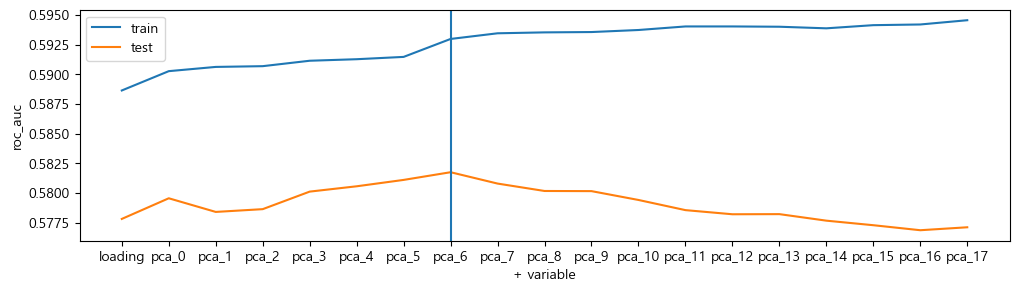

In [84]:
# 전진 선택 단계에 따른 train / test의 성능 변화를 보입니다.
plt.figure(figsize=(12, 3))
sns.lineplot(x = ['loading'] + ['pca_{}'.format(i) for i in range(18)], y = auc_train, label='train')
sns.lineplot(x = ['loading'] + ['pca_{}'.format(i) for i in range(18)], y = auc_test, label='test')
plt.axvline(np.argmax(auc_test))
plt.gca().set_xlabel('+ variable')
plt.gca().set_ylabel('roc_auc')
plt.show()

In [85]:
A, B, A + B, round(A + B, 2)

(0.6995009550811424, 0.49053704530610653, 1.1900380003872488, 1.19)

A + B를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구하라.

**1.19**

# 문제 5

랜덤포레스트 분류기(Random-Forest Classifier)의 최적의 하이퍼 파라미터(Hyper-Parameter, 초매개변수)를 탐색하고자 한다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준 정규화 과정을 거친) 과정을 거친 **prob3_train**과 **prob3_test**를 사용한다.

## 단계 5-1

sklearn에서 제공하는 랜덤포레스트 분류기(Random-Forest Classifier)의 하이퍼 파라미터 중 

n_estimators, max_depth 그리고 min_samples_split의 최적 조합을 탐색한다. 

탐색 값은 아래에 제공한 하이퍼 파라미터의 모든 조합이다. 

**prob3_train**을 대상으로 5-겹 층화교차검증(5-fold stratified cross validation)으로 성능 측정 결과를 기준으로 하이퍼 파라미터를 선택한다.

  - n_estimators: [5, 10, 15]

  - max_depth: [5, 6, 7]
  
  - min_samples_split: [256, 512]

Hint] 모든 하이퍼 파라미터의 조합의 수는 18개이다

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

itertools.product 필요시 사용

sklearn.model_selection.cross_val_score 필요시 사용

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True,

sklearn.model_selection.GridSearchCV, iid = False 필요시 사용

sklearn.metrics.roc_auc_score 필요시 사용

---

In [86]:
# 방법1: 쉬운 길
from sklearn.model_selection import GridSearchCV# , iid = False
from sklearn.ensemble import RandomForestClassifier#, random_state=123
from sklearn.model_selection import StratifiedKFold#, random_state=123, shuffle=True,

gs = GridSearchCV(
    estimator = RandomForestClassifier(random_state=123), # 랜덤포레스트 분류기(Random-Forest Classifier)
    # param_grid: dictionary 키는 파라메터 value는 grid를 구성할 값의 리스트
    param_grid = {
        'n_estimators': [5, 10, 15],
        'max_depth': [5, 6, 7],
        'min_samples_split': [256, 512]
    },
    cv = StratifiedKFold(5, random_state=123, shuffle=True), # prob3_train을 대상으로 5-겹 층화교차검증(5-fold stratified cross validation)
    scoring = 'roc_auc', # AUC (area under of ROC curve), mean_squared_error: 'neg_mean_squared_error'
    iid = False
)
# loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)
X_gs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
gs.fit(df_prob3_train[X_gs], df_prob3_train['failure'])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=

In [87]:
best_params = gs.best_params_
best_params, gs.best_score_#, gs.cv_results_

({'max_depth': 7, 'min_samples_split': 512, 'n_estimators': 15},
 0.5745226991354744)

In [88]:
# 방법2: 어려운 길 
from itertools import product
from sklearn.ensemble import RandomForestClassifier#, random_state=123
from sklearn.model_selection import StratifiedKFold#, random_state=123, shuffle=True,
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(5, random_state=123, shuffle=True)
X_gs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
"""
params_list = list()
for n_estimators in [5, 10, 15]:
    for max_depth in [5, 6, 7]:
        for min_samples_split in [256, 512]:
            params_list.append({
                'n_estimators': n_estimators, 
                'max_depth': max_depth, 
                'min_samples_split': min_samples_split
            })
"""
# itertools.product를 이용 하면 보다 쉽게 만들 수 있습니다.
params_list = [
    {
        'n_estimators': n_estimators, 
        'max_depth': max_depth, 
        'min_samples_split': min_samples_split
    }
    for n_estimators, max_depth, min_samples_split in product([5, 10, 15], [5, 6, 7], [256, 512])
]
auc_list = list()
for params in params_list:
    clf_rf = RandomForestClassifier(**params, random_state=123)
    # cross_val_score까지 직접 구현해봅니다.
    scores = list()
    # splitter를 사용하여 train과 valid를 분리해봅니다.
    for train_idx, valid_idx in skf.split(df_prob3_train[X_gs], df_prob3_train['failure']):
        # split 메소드는 train과 valid 의 위치 인덱스를 줍니다. iloc으로 가져옵니다.
        df_cv_train, df_valid = df_prob3_train.iloc[train_idx], df_prob3_train.iloc[valid_idx]
        clf_rf.fit(df_cv_train[X_gs], df_cv_train['failure'])
        scores.append(
            roc_auc_score(df_valid['failure'], clf_rf.predict_proba(df_valid[X_gs])[:, 1])
        )
    auc_list.append(np.mean(scores))
    print(params, auc_list[-1])

{'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 256} 0.5547115468443294
{'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 512} 0.5617150416141751
{'n_estimators': 5, 'max_depth': 6, 'min_samples_split': 256} 0.5568999583940097
{'n_estimators': 5, 'max_depth': 6, 'min_samples_split': 512} 0.5623239919998733
{'n_estimators': 5, 'max_depth': 7, 'min_samples_split': 256} 0.5567633668997499
{'n_estimators': 5, 'max_depth': 7, 'min_samples_split': 512} 0.5642015275666604
{'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 256} 0.5654552370913933
{'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 512} 0.5707474621000601
{'n_estimators': 10, 'max_depth': 6, 'min_samples_split': 256} 0.5681316681217556
{'n_estimators': 10, 'max_depth': 6, 'min_samples_split': 512} 0.5680847464819798
{'n_estimators': 10, 'max_depth': 7, 'min_samples_split': 256} 0.5670255107788329
{'n_estimators': 10, 'max_depth': 7, 'min_samples_split': 512} 0.5724060304780464
{'n_estimators': 15, '

In [89]:
best_params = params_list[np.argmax(auc_list)]
best_params, np.max(auc_list) # {'max_depth': 7, 'min_samples_split': 512, 'n_estimators': 15}, 0.5745226991354744

({'n_estimators': 15, 'max_depth': 7, 'min_samples_split': 512},
 0.5745226991354744)

**Tip** (make_pipeline + ColumnTransformer + RandomForest) + GridSearchCV

In [90]:
# (make_pipeline + ColumnTransformer + RandomForest) + GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('std_pca', make_pipeline(StandardScaler(), PCA()), ['measurement_{}'.format(i) for i in range(18)]),
    ('pt', 'passthrough', ['loading', 'na_1', 'na_2'])
])
# 기본 파라메터: random_state = 123, min_samples_split 512
clf_rf = make_pipeline(ct, RandomForestClassifier(random_state=123, min_samples_split = 512))

X_gs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
# Model naming: Class이름 소문자
# 단계 구분자: __
# Class 이름과 각 단계의 명칭을 단계 구분자 __로 연결하면 GridSearchCV에게 전달하는 파라메터가 됩니다,
# 랜던포레스트 n_estimators : [5, 10, 15], max_depth [5, 6, 7]
# PCA n_components: [5, 7, 9]

gs = GridSearchCV(
    estimator = clf_rf, # 랜덤포레스트 분류기(Random-Forest Classifier)
    param_grid = {
        "randomforestclassifier__n_estimators": [5, 10, 15],
        "randomforestclassifier__max_depth": [5, 6, 7],
        "columntransformer__std_pca__pca__n_components": [5, 7, 9]
    },
    cv = StratifiedKFold(5, random_state=123, shuffle=True), # 5-겹 층화교차검증(5-fold stratified cross validation)으로 성능 측정 결과
    scoring = 'roc_auc', # 성능 지표: AUC
    iid = False
)
gs.fit(df_prob3_train[X_gs], df_prob3_train['failure'])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('std_pca',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=T...
                                                          

In [91]:
gs.best_params_

{'columntransformer__std_pca__pca__n_components': 5,
 'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__n_estimators': 15}

## 단계 5-2

단계 5-1에서 구한 최적 하이퍼 파라미터로 설정한 랜덤포레스트 분류기(Random-Forest Classifier)를 사용하여 **prob3_train**을 학습하고, 

**prob3_test**로 성능 측정한 결과를 A라고 한다.

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

sklearn.metrics.roc_auc_score

---


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X_gs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
clf_rf = RandomForestClassifier(**best_params, random_state=123)
clf_rf.fit(df_prob3_train[X_gs], df_prob3_train['failure'])
A = roc_auc_score(
    df_prob3_test['failure'], clf_rf.predict_proba(df_prob3_test[X_gs])[:, 1]
)
(
    A,
    roc_auc_score(
        df_prob3_train['failure'], clf_rf.predict_proba(df_prob3_train[X_gs])[:, 1]
    )
) # LR + SFS: 0.5917537024093409

(0.5687712018291998, 0.6416568062149542)

In [93]:
A, round(A, 3)

(0.5687712018291998, 0.569)

A값을 소수점 넷째 자리에서 반올림하여 3째 자리까지 출력하시오.

**0.569**

**Tip** 교차 검점 과정에서 SMOTE Oversampling (sampling_strategy = 'minority')을 적용해봅니다.

지표는 f1_score를 사용합니다.

In [94]:
df_prob3_train['failure'].value_counts(normalize=True)

0    0.788535
1    0.211465
Name: failure, dtype: float64

In [95]:
import imblearn
# sampling_strategy 샘플링 대상을 지정, minority: 가장 저빈도 클래스
smote = imblearn.over_sampling.SMOTE(sampling_strategy = 'minority')
# fit_resample 샘플링 수행
X_re, y_re = smote.fit_resample(df_prob3_train[X_gs], df_prob3_train['failure'])
# np.array를 DataFrame으로 재구성하여 사용성을 높입니다.
df_smote = pd.DataFrame(X_re, columns = X_gs).assign(
    failure = y_re
)
df_smote.head()

loading  measurement_0  measurement_1  measurement_2  measurement_3  \
0 -0.577100      -1.014834       0.988654       0.608313      -1.219573   
1  1.853148      -1.250324      -0.929650       0.912362      -1.220579   
2  0.509210      -0.779343       0.748866       1.824512      -1.582543   
3  0.082142      -1.485815      -0.210286       0.000213      -0.999378   
4 -0.570930      -1.014834       0.988654      -0.607887      -0.353874   

   measurement_4  measurement_5  measurement_6  measurement_7  measurement_8  \
0       2.315742       2.149935       0.129206       0.481958       0.100301   
1      -1.797575      -0.771911       0.175545      -0.629557       0.212792   
2       1.189823       0.945189       1.470030       0.086709       1.522865   
3       1.477825       0.381844       1.196022       0.375622       0.014725   
4      -0.441856       0.508145      -0.994024       2.443161      -0.166492   

   ...  measurement_11  measurement_12  measurement_13  measurement_14  \
0  ...       -0.944188        0.578288        0.269921        1.985320   
1  ...       -0.632997        0.535767       -0.365820       -0.065802   
2  ...        1.196195       -1.241071        0.600403        0.533841   
3  ...       -1.013130       -0.136908        0.695199       -0.648998   
4  ...        1.137372       -3.613207       -0.893721        2.367721   

   measurement_15  measurement_16  measurement_17  na_1  na_2  failure  
0       -0.127064       -0.473798        1.753419   0.0   1.0        0  
1        2.202253        1.973899       -1.441619   0.0   0.0        0  
2        0.247869        0.994222        0.554850   0.0   0.0        0  
3       -0.889767        0.923604        0.776436   0.0   0.0        0  
4       -0.937056       -2.220102       -0.338670   0.0   0.0        0  

[5 rows x 22 columns]

In [97]:
# SMOTE Oversampler를 통해 얻어오 데이터의 failure 빈도: 최고빈도 클래스 수만큼 표본이 만들어졌습니다.
df_smote['failure'].value_counts()

1    10829
0    10829
Name: failure, dtype: int64

In [96]:
# 방법2: 어려운 길 
from itertools import product
from sklearn.ensemble import RandomForestClassifier#, random_state=123
from sklearn.model_selection import StratifiedKFold#, random_state=123, shuffle=True,
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(5, random_state=123, shuffle=True)
X_gs = ['loading'] + ['measurement_{}'.format(i) for i in range(18)] + ['na_1', 'na_2']
"""
params_list = list()
for n_estimators in [5, 10, 15]:
    for max_depth in [5, 6, 7]:
        for min_samples_split in [256, 512]:
            params_list.append({
                'n_estimators': n_estimators, 
                'max_depth': max_depth, 
                'min_samples_split': min_samples_split
            })
"""
# itertools.product를 이용 하면 보다 쉽게 만들 수 있습니다.
params_list = [
    {
        'n_estimators': n_estimators, 
        'max_depth': max_depth, 
        'min_samples_split': min_samples_split
    }
    for n_estimators, max_depth, min_samples_split in product([5, 10, 15], [5, 6, 7], [256, 512])
]
f1_list = list()
f1_smote_list = list()
smote = imblearn.over_sampling.SMOTE(sampling_strategy = 'minority')
for params in params_list:
    clf_rf = RandomForestClassifier(**params, random_state=123)
    # cross_val_score까지 직접 구현해봅니다.
    scores = list()
    smote_scores = list()
    # splitter를 사용하여 train과 valid를 분리해봅니다.
    for train_idx, valid_idx in skf.split(df_prob3_train[X_gs], df_prob3_train['failure']):
        # split 메소드는 train과 valid 의 위치 인덱스를 줍니다. iloc으로 가져옵니다.
        df_cv_train, df_valid = df_prob3_train.iloc[train_idx], df_prob3_train.iloc[valid_idx]
        clf_rf.fit(df_cv_train[X_gs], df_cv_train['failure'])
        prd = clf_rf.predict(df_valid[X_gs])
        scores.append(
            f1_score(df_valid['failure'], prd) if prd.sum() != 0 else 0
        )
        # SMOTE 루틴을 적용합니다.
        X_re, y_re = smote.fit_resample(df_cv_train[X_gs], df_cv_train['failure'])
        df_smote = pd.DataFrame(X_re, columns = X_gs).assign(
            failure = y_re
        )
        clf_rf.fit(df_smote[X_gs], df_smote['failure'])
        smote_scores.append(
            f1_score(df_valid['failure'], clf_rf.predict(df_valid[X_gs]))
        )
    f1_list.append(np.mean(scores))
    f1_smote_list.append(np.mean(smote_scores))
    print(params, f1_list[-1], f1_smote_list[-1])

{'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 256} 0.0005471956224350205 0.31137265597830205
{'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 512} 0.000547945205479452 0.31735736805497233
{'n_estimators': 5, 'max_depth': 6, 'min_samples_split': 256} 0.0010973957549300015 0.31381576797550564
{'n_estimators': 5, 'max_depth': 6, 'min_samples_split': 512} 0.000547945205479452 0.3193933427544387
{'n_estimators': 5, 'max_depth': 7, 'min_samples_split': 256} 0.0005494505494505495 0.31236173697577374
{'n_estimators': 5, 'max_depth': 7, 'min_samples_split': 512} 0.0016445872559520455 0.3180585985434066
{'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 256} 0.0005502063273727648 0.3214653831436964
{'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 512} 0.0 0.32488204616367594
{'n_estimators': 10, 'max_depth': 6, 'min_samples_split': 256} 0.0005502063273727648 0.3192896330993166
{'n_estimators': 10, 'max_depth': 6, 'min_samples_split': 512} 0.0 0.3201007143683242